In [1]:
from bpd.io import load_dataset
import matplotlib.pyplot as plt

import numpy as np

## Small test

In [15]:
path_boot = "/pscratch/sd/i/imendoza/data/cache_chains/exp72_51/g_samples_boots_515.npz"

In [16]:
fp = "/pscratch/sd/i/imendoza/data/cache_chains/exp72_51/g_samples_512_plus.npz"
fm = "/pscratch/sd/i/imendoza/data/cache_chains/exp72_51/g_samples_512_minus.npz"

In [17]:
dsb = load_dataset(path_boot)
dsp = load_dataset(fp)
dsm = load_dataset(fm)
dsb['plus']['g1'].shape

(500, 1000)

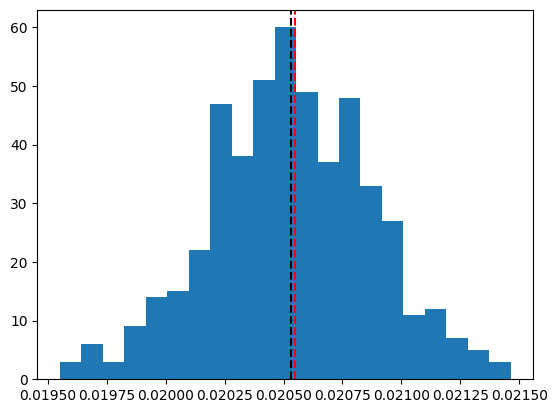

In [18]:
plt.hist(dsb['plus']['g1'].mean(1), bins=21)
plt.axvline(dsb['plus']['g1'].mean(), c='k', ls='--')
plt.axvline(dsp['samples']['g1'].mean(), c='r', ls='--')

In [19]:
m = (dsp['samples']['g1'].mean() - dsm['samples']['g1'].mean()) / 0.02 / 2 - 1

In [20]:
mb = (dsb['plus']['g1'].mean(1) - dsb['minus']['g1'].mean(1)) / 2/ 0.02 - 1
mb.shape

(500,)

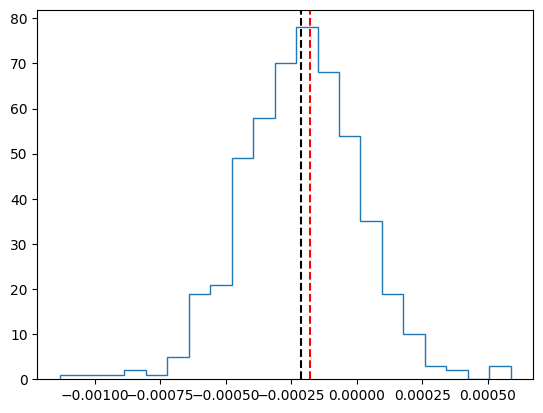

In [21]:
plt.hist(mb, bins=21, histtype='step')
plt.axvline(m, c='r', ls='--')
plt.axvline(mb.mean(), c='k', ls='--')

In [22]:
mb.std() / 1e-3  * 3

np.float64(0.6751441668765102)

# New plot of all means so far

In [2]:
fpath1p= "/pscratch/sd/i/imendoza/data/cache_chains/exp70_51/g_samples_512_plus.npz"
fpath1m= "/pscratch/sd/i/imendoza/data/cache_chains/exp70_51/g_samples_512_minus.npz"
fpath2p= "/pscratch/sd/i/imendoza/data/cache_chains/exp71_51/shear_samples_512_plus.npz"
fpath2m= "/pscratch/sd/i/imendoza/data/cache_chains/exp71_51/shear_samples_512_minus.npz"
fpath3p= "/pscratch/sd/i/imendoza/data/cache_chains/exp72_51/g_samples_512_plus.npz"
fpath3m= "/pscratch/sd/i/imendoza/data/cache_chains/exp72_51/g_samples_512_minus.npz"
fpath4p= "/pscratch/sd/i/imendoza/data/cache_chains/exp73_51/shear_samples_512_plus.npz"
fpath4m= "/pscratch/sd/i/imendoza/data/cache_chains/exp73_51/shear_samples_512_minus.npz"

fpaths = [(fpath1p, fpath1m), (fpath2p, fpath2m), (fpath3p, fpath3m), (fpath4p, fpath4m)]

In [3]:
efpath1= "/pscratch/sd/i/imendoza/data/cache_chains/exp70_51/g_samples_514_errs.npz"
efpath2= "/pscratch/sd/i/imendoza/data/cache_chains/exp71_51/g_samples_514_errs.npz"
efpath3= "/pscratch/sd/i/imendoza/data/cache_chains/exp72_51/g_samples_514_errs.npz"
efpath4= "/pscratch/sd/i/imendoza/data/cache_chains/exp73_51/g_samples_514_errs.npz"

errs_fpaths = [efpath1, efpath2, efpath3, efpath4]

In [4]:
bfpath1= "/pscratch/sd/i/imendoza/data/cache_chains/exp70_51/g_samples_boots_515.npz"
bfpath2= "/pscratch/sd/i/imendoza/data/cache_chains/exp71_51/g_samples_boots_515.npz"
bfpath3= "/pscratch/sd/i/imendoza/data/cache_chains/exp72_51/g_samples_boots_515.npz"
bfpath4 = "/pscratch/sd/i/imendoza/data/cache_chains/exp73_51/g_samples_boots_515.npz"

boot_fpaths = [bfpath1, bfpath2, bfpath3, bfpath4]

In [5]:
# full posterior 
m_full = []
for (fpp, fpm) in fpaths:
    dsp = load_dataset(fpp)
    dsm = load_dataset(fpm)
    g1p = dsp['samples']['g1']
    g1m = dsm['samples']['g1']
    assert g1p.ndim == 1
    m = (g1p.mean() - g1m.mean()) / 2/ 0.02 - 1
    m_full.append(m)
m_full = np.array(m_full)

In [6]:
# subset posterior 
m_sub = []
sigma_m = [] 
for fp in errs_fpaths:
    ds = load_dataset(fp)
    g1p = ds['plus']['g1']
    g1m = ds['minus']['g1']
    assert g1p.ndim == 2
    ms = (g1p.mean(1) - g1m.mean(1)) / 2/ 0.02 - 1
    ms_mean = ms.mean()
    sigm = ms.std() / np.sqrt(len(ms))
    m_sub.append(ms_mean)
    sigma_m.append(sigm)
m_sub = np.array(m_sub)
sigma_m = np.array(sigma_m)

In [7]:
# bootstrap posterior 
m_boot = []
err_boot = [] 
for fp in boot_fpaths:
    ds = load_dataset(fp)
    g1p = ds['plus']['g1']
    g1m = ds['minus']['g1']
    assert g1p.ndim == 2
    mb = (g1p.mean(1) - g1m.mean(1)) / 2/ 0.02 - 1
    mb_mean = mb.mean()
    sigb = mb.std()
    m_boot.append(mb_mean)
    err_boot.append(sigb)
m_boot = np.array(m_boot)
err_boot = np.array(err_boot)

In [8]:
len(set(mb)), mb.shape

(210, (210,))

(array([ 3., 10., 17., 26., 37., 33., 43., 23., 12.,  3.,  3.]),
 array([-9.51277682e-04, -8.05787373e-04, -6.60297064e-04, -5.14806755e-04,
        -3.69316446e-04, -2.23826137e-04, -7.83358280e-05,  6.71544810e-05,
         2.12644790e-04,  3.58135099e-04,  5.03625408e-04,  6.49115717e-04]),
 <BarContainer object of 11 artists>)

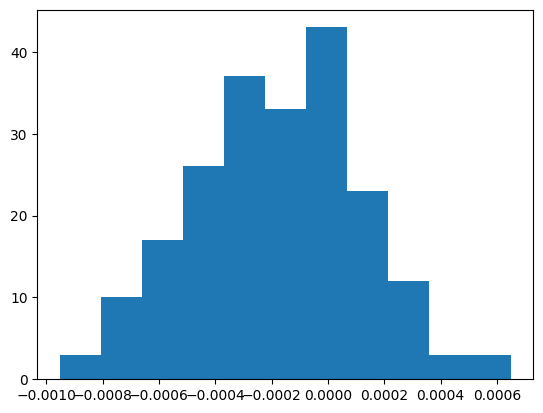

In [9]:
plt.hist(mb, bins=11)

In [10]:
m_full/1e-3

array([-0.36092321, -0.26664114, -0.17723907, -0.31302023])

In [15]:
mb[:100].std() / 1e-3 * 3

np.float64(0.9114587888411472)

In [11]:
sigma_m / 1e-3 * 3, err_boot / 1e-3 * 3

(array([0.75781401, 0.94637404, 0.77809427, 1.33108432]),
 array([0.69788218, 0.91274196, 0.67514417, 0.89345714]))

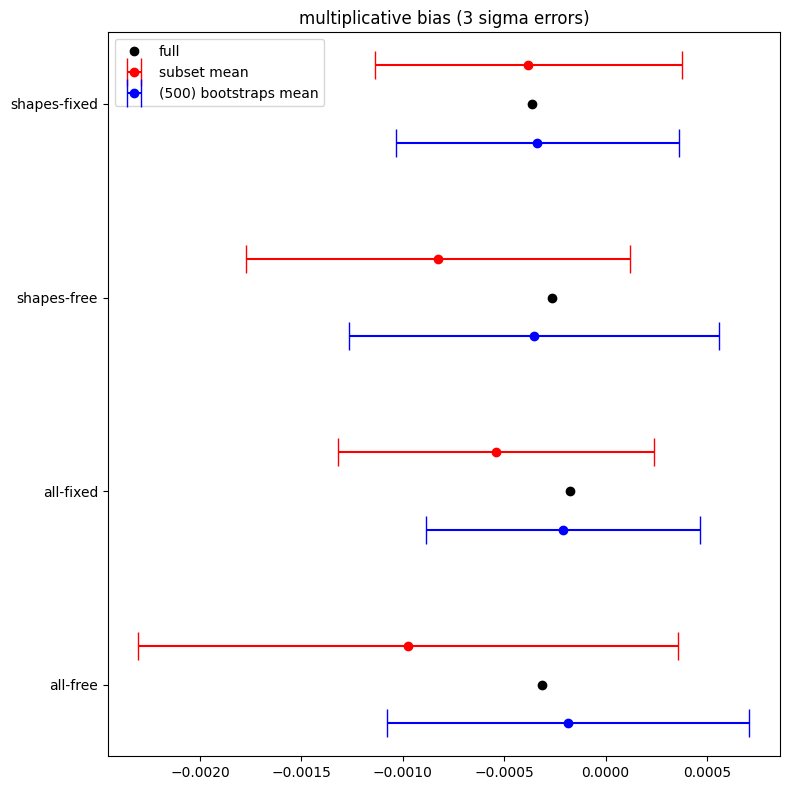

In [13]:

fig, ax = plt.subplots(1,1, figsize=(8,8))
ys = np.array([0.75, 0.5, 0.25, 0.0])
ys2 = np.array([0.75, 0.5, 0.25, 0.0])

# multiplicative bias
ax.errorbar(x=m_full, y=ys, color="k", fmt="o", capsize=10.0, label='full')
ax.errorbar(x=m_sub, xerr=[s*3 for s in sigma_m],  y=ys+0.05, color="r", fmt="o", capsize=10.0, label='subset mean ')
ax.errorbar(x=m_boot, xerr=[s*3 for s in err_boot],  y=ys2-0.05, color="b", fmt="o", capsize=10.0, label='(500) bootstraps mean')
# ax.errorbar(x=mu3, y=ys+0.1, color="b", fmt="o", capsize=10.0, label='gaussian')
# ax.errorbar(x=mu4, y=ys-0.05, color="m", fmt="o", capsize=10.0)


ax.set_yticks([0.75, 0.5, 0.25, 0.0])
ax.set_yticklabels(["shapes-fixed", "shapes-free", "all-fixed", "all-free"])
plt.title("multiplicative bias (3 sigma errors)")
# ax.set_ylim(-0.1, 0.85)



# ax.set_xlim(-3, 3)
plt.legend()
plt.tight_layout()